In [108]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_blobs
import numpy as np
import seaborn as sns


In [109]:
solicitacoes_credito = pd.read_pickle('saidas/solicitacoes_credito_tratado.pkl')

In [110]:
solicitacoes_credito.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4538 entries, 4 to 8963
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   maiorAtraso                  4538 non-null   int64  
 1   prazoMedioRecebimentoVendas  4538 non-null   int64  
 2   titulosEmAberto              4538 non-null   float64
 3   valorSolicitado              4538 non-null   float64
 4   status                       4538 non-null   object 
 5   valorAprovado                4538 non-null   float64
 6   periodoBalanco               4538 non-null   object 
 7   ativoCirculante              4538 non-null   float64
 8   passivoCirculante            4538 non-null   float64
 9   totalAtivo                   4538 non-null   float64
 10  totalPatrimonioLiquido       4538 non-null   float64
 11  endividamento                4538 non-null   float64
 12  duplicatasAReceber           4538 non-null   float64
 13  estoque                

In [111]:
solicitacoes_credito2 = solicitacoes_credito
solicitacoes_credito2.head(2)

,maiorAtraso,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,valorAprovado,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,...,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,custos,intervaloFundacao,capitalSocial,limiteEmpresaAnaliseCredito,score_atraso
4,20,20,1486.95,50000.0,AprovadoAnalista,50000.0,2019-09-30T00:00:00,14758917.0,12149031.0,25793410.0,...,3039112.0,11797928.0,3047791.0,40779757.0,81459809.0,40680051.0,Acima de 17 anos,75000.0,89000.0,0.979529
7,4,102,208980.00,300000.0,AprovadoAnalista,300000.0,2019-09-30T03:00:00,17801610.0,2538069.0,19415777.0,...,0.0,3742963.0,11902384.0,11958227.0,9357949.0,0.0,Acima de 17 anos,120000.0,768233.0,0.995906


In [112]:
label_encoder_status = LabelEncoder()
label_encoder_periodoBalanco = LabelEncoder()
label_encoder_intervaloFundacao = LabelEncoder()

# Aplicando fit_transform para codificar
solicitacoes_credito2['status'] = label_encoder_status.fit_transform(solicitacoes_credito2['status'])
solicitacoes_credito2['periodoBalanco'] = label_encoder_periodoBalanco.fit_transform(solicitacoes_credito2['periodoBalanco'])
solicitacoes_credito2['intervaloFundacao'] = label_encoder_intervaloFundacao.fit_transform(solicitacoes_credito2['intervaloFundacao'])

solicitacoes_credito2.head(2)

,maiorAtraso,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,valorAprovado,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,...,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,custos,intervaloFundacao,capitalSocial,limiteEmpresaAnaliseCredito,score_atraso
4,20,20,1486.95,50000.0,1,50000.0,51,14758917.0,12149031.0,25793410.0,...,3039112.0,11797928.0,3047791.0,40779757.0,81459809.0,40680051.0,0,75000.0,89000.0,0.979529
7,4,102,208980.00,300000.0,1,300000.0,52,17801610.0,2538069.0,19415777.0,...,0.0,3742963.0,11902384.0,11958227.0,9357949.0,0.0,0,120000.0,768233.0,0.995906


In [113]:
# Descobrindo qual o melhor numero de clusters(cotovelo)
distorcions = []
n_clusters = range(2, 15)
for n_cluster2 in n_clusters:
    print(n_cluster2)
    distorcions.append(KMeans(n_clusters=n_cluster2, max_iter=10_000, n_init=100, random_state=61658).fit(solicitacoes_credito2).inertia_)


2
3
4
5
6
7
8
9
10
11
12
13
14


<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

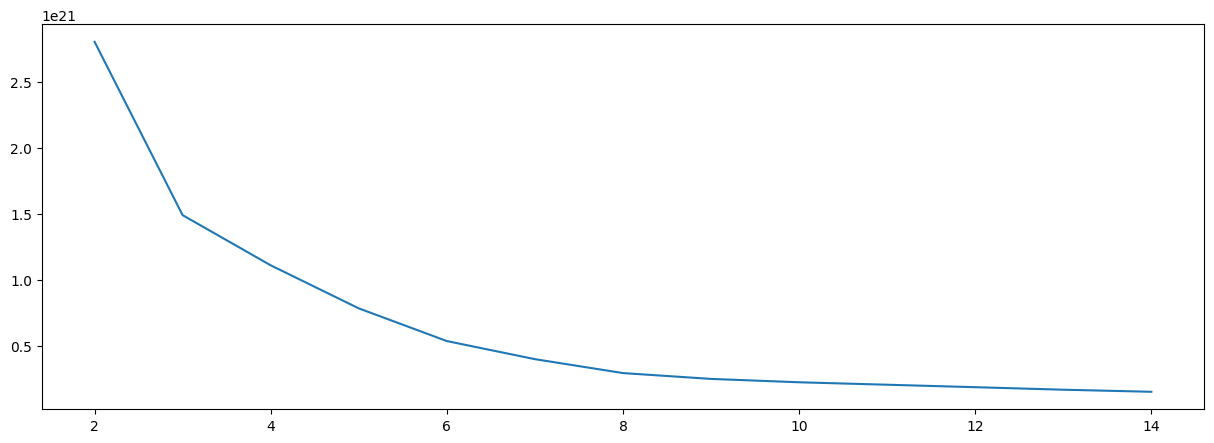

In [114]:
plt.figure(figsize=(15,5))
plt.plot(n_clusters, distorcions)
plt.grid
# Aqui, consideramos o ultimo "cotovelo" que no caso é o 4

In [115]:
# Clusterização

km = KMeans(n_clusters=4, max_iter=10_000, n_init=100, random_state=61658)
X_t = km.fit_predict(solicitacoes_credito2)
X_t

# --------------------------------

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [116]:
solicitacoes_credito2['status2'] = label_encoder_status.inverse_transform(solicitacoes_credito2['status'])
solicitacoes_credito2['periodoBalanco2'] = label_encoder_periodoBalanco.inverse_transform(solicitacoes_credito2['periodoBalanco'])
solicitacoes_credito2['intervaloFundacao2'] = label_encoder_intervaloFundacao.inverse_transform(solicitacoes_credito2['intervaloFundacao'])


In [117]:
solicitacoes_credito2.head(2)

,maiorAtraso,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,valorAprovado,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,...,faturamentoBruto,margemBruta,custos,intervaloFundacao,capitalSocial,limiteEmpresaAnaliseCredito,score_atraso,status2,periodoBalanco2,intervaloFundacao2
4,20,20,1486.95,50000.0,1,50000.0,51,14758917.0,12149031.0,25793410.0,...,40779757.0,81459809.0,40680051.0,0,75000.0,89000.0,0.979529,AprovadoAnalista,2019-09-30T00:00:00,Acima de 17 anos
7,4,102,208980.00,300000.0,1,300000.0,52,17801610.0,2538069.0,19415777.0,...,11958227.0,9357949.0,0.0,0,120000.0,768233.0,0.995906,AprovadoAnalista,2019-09-30T03:00:00,Acima de 17 anos


In [118]:
solicitacoes_credito2.loc[:, 'cluster'] = X_t

In [119]:

solicitacoes_credito3 = solicitacoes_credito2[solicitacoes_credito2['cluster'].isin([2, 5, 6, 4])]

In [120]:
solicitacoes_credito3.head()

,maiorAtraso,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,valorAprovado,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,...,margemBruta,custos,intervaloFundacao,capitalSocial,limiteEmpresaAnaliseCredito,score_atraso,status2,periodoBalanco2,intervaloFundacao2,cluster
295,16,0,0.00,100000.0,2,100000.0,27,1.334726e+09,1.030495e+09,1.776012e+09,...,0.000000e+00,0.000000e+00,0,330742994.0,0.0,0.983623,AprovadoComite,2018-12-31T02:00:00,Acima de 17 anos,2
296,17,0,0.00,400000.0,2,400000.0,27,1.334726e+09,1.030495e+09,1.776012e+09,...,0.000000e+00,0.000000e+00,0,330742994.0,0.0,0.982600,AprovadoComite,2018-12-31T02:00:00,Acima de 17 anos,2
409,0,64,5400.00,5000.0,1,5000.0,26,2.490038e+09,4.575015e+08,3.698216e+09,...,1.373143e+09,7.982745e+08,0,900000000.0,128430684.0,1.000000,AprovadoAnalista,2018-12-31T00:00:00,Acima de 17 anos,2
438,25,0,27856.00,400000.0,1,400000.0,65,9.497130e+08,3.341210e+08,1.107920e+09,...,6.905890e+08,1.600877e+06,0,3830000.0,248312960.0,0.974411,AprovadoAnalista,2019-12-31T03:00:00,Acima de 17 anos,2
944,19,54,820167.46,300000.0,2,300000.0,27,3.355186e+08,2.989122e+08,4.427892e+08,...,3.762784e+08,1.038190e+09,0,10000000.0,0.0,0.980553,AprovadoComite,2018-12-31T02:00:00,Acima de 17 anos,2


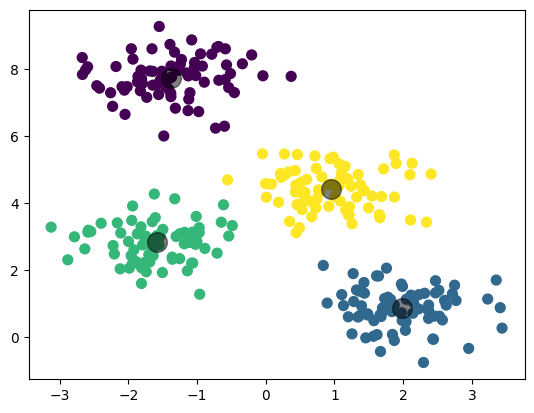

In [121]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);



In [122]:
solicitacoes_credito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4538 entries, 4 to 8963
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   maiorAtraso                  4538 non-null   int64  
 1   prazoMedioRecebimentoVendas  4538 non-null   int64  
 2   titulosEmAberto              4538 non-null   float64
 3   valorSolicitado              4538 non-null   float64
 4   status                       4538 non-null   int32  
 5   valorAprovado                4538 non-null   float64
 6   periodoBalanco               4538 non-null   int32  
 7   ativoCirculante              4538 non-null   float64
 8   passivoCirculante            4538 non-null   float64
 9   totalAtivo                   4538 non-null   float64
 10  totalPatrimonioLiquido       4538 non-null   float64
 11  endividamento                4538 non-null   float64
 12  duplicatasAReceber           4538 non-null   float64
 13  estoque                

In [123]:
solicitacoes_credito2['status'] = label_encoder_status.inverse_transform(solicitacoes_credito2['status'])
solicitacoes_credito2['periodoBalanco'] = label_encoder_periodoBalanco.inverse_transform(solicitacoes_credito2['periodoBalanco'])
solicitacoes_credito2['intervaloFundacao'] = label_encoder_intervaloFundacao.inverse_transform(solicitacoes_credito2['intervaloFundacao'])

In [124]:
solicitacoes_credito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4538 entries, 4 to 8963
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   maiorAtraso                  4538 non-null   int64  
 1   prazoMedioRecebimentoVendas  4538 non-null   int64  
 2   titulosEmAberto              4538 non-null   float64
 3   valorSolicitado              4538 non-null   float64
 4   status                       4538 non-null   object 
 5   valorAprovado                4538 non-null   float64
 6   periodoBalanco               4538 non-null   object 
 7   ativoCirculante              4538 non-null   float64
 8   passivoCirculante            4538 non-null   float64
 9   totalAtivo                   4538 non-null   float64
 10  totalPatrimonioLiquido       4538 non-null   float64
 11  endividamento                4538 non-null   float64
 12  duplicatasAReceber           4538 non-null   float64
 13  estoque                

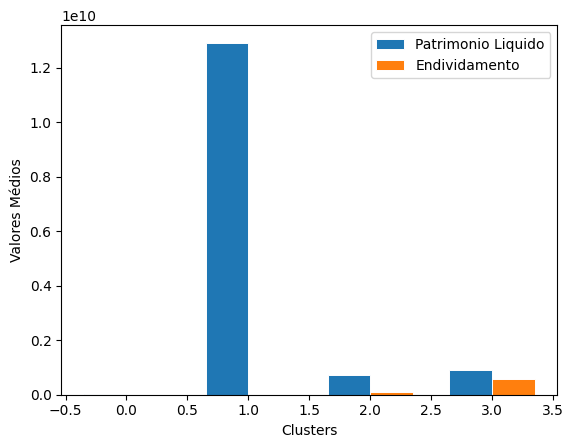

In [125]:
# Agrupar pelo campo 'cluster' e calcular a média de 'patrimonio' e 'endividamento'
media_patrimonio_endividamento = solicitacoes_credito.groupby('cluster')[['totalPatrimonioLiquido', 'endividamento']].mean()

# Definir a largura de cada barra
largura_barra = 0.35
clusters = media_patrimonio_endividamento.index

# Criar subgráficos para patrimônio e endividamento lado a lado
fig, ax = plt.subplots()

# Barras para o patrimônio
ax.bar(clusters - largura_barra/2, media_patrimonio_endividamento['totalPatrimonioLiquido'], width=largura_barra, label='Patrimonio Liquido', edgecolor="white", linewidth=0.7)

# Barras para o endividamento
ax.bar(clusters + largura_barra/2, media_patrimonio_endividamento['endividamento'], width=largura_barra, label='Endividamento', edgecolor="white", linewidth=0.7)

# Configurações do gráfico
ax.set_xlabel('Clusters')
ax.set_ylabel('Valores Médios')

ax.legend()

# Exibir gráfico
plt.show()


In [126]:
solicitacoes_credito.head(2)

,maiorAtraso,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,valorAprovado,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,...,margemBruta,custos,intervaloFundacao,capitalSocial,limiteEmpresaAnaliseCredito,score_atraso,status2,periodoBalanco2,intervaloFundacao2,cluster
4,20,20,1486.95,50000.0,AprovadoAnalista,50000.0,2019-09-30T00:00:00,14758917.0,12149031.0,25793410.0,...,81459809.0,40680051.0,Acima de 17 anos,75000.0,89000.0,0.979529,AprovadoAnalista,2019-09-30T00:00:00,Acima de 17 anos,0
7,4,102,208980.00,300000.0,AprovadoAnalista,300000.0,2019-09-30T03:00:00,17801610.0,2538069.0,19415777.0,...,9357949.0,0.0,Acima de 17 anos,120000.0,768233.0,0.995906,AprovadoAnalista,2019-09-30T03:00:00,Acima de 17 anos,0


In [127]:
solicitacoes_credito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4538 entries, 4 to 8963
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   maiorAtraso                  4538 non-null   int64  
 1   prazoMedioRecebimentoVendas  4538 non-null   int64  
 2   titulosEmAberto              4538 non-null   float64
 3   valorSolicitado              4538 non-null   float64
 4   status                       4538 non-null   object 
 5   valorAprovado                4538 non-null   float64
 6   periodoBalanco               4538 non-null   object 
 7   ativoCirculante              4538 non-null   float64
 8   passivoCirculante            4538 non-null   float64
 9   totalAtivo                   4538 non-null   float64
 10  totalPatrimonioLiquido       4538 non-null   float64
 11  endividamento                4538 non-null   float64
 12  duplicatasAReceber           4538 non-null   float64
 13  estoque                

In [128]:
# Remover os clusters 2, 5, 6 e 4 em uma única operação
# Excluir linhas onde o valor da coluna 'cluster' é 2, 5, 6 ou 4
solicitacoes_credito4 = solicitacoes_credito[~solicitacoes_credito['cluster'].isin([2, 5, 6, 4])]


In [129]:
solicitacoes_credito.to_pickle('saidas/solicitacoes_credito_clusters.pkl')

In [130]:
solicitacoes_credito.to_excel('saidas/solicitacoes_credito_clusters.xlsx')

In [131]:
print(solicitacoes_credito.columns)

Index(['maiorAtraso', 'prazoMedioRecebimentoVendas', 'titulosEmAberto',
       'valorSolicitado', 'status', 'valorAprovado', 'periodoBalanco',
       'ativoCirculante', 'passivoCirculante', 'totalAtivo',
       'totalPatrimonioLiquido', 'endividamento', 'duplicatasAReceber',
       'estoque', 'faturamentoBruto', 'margemBruta', 'custos',
       'intervaloFundacao', 'capitalSocial', 'limiteEmpresaAnaliseCredito',
       'score_atraso', 'status2', 'periodoBalanco2', 'intervaloFundacao2',
       'cluster'],
      dtype='object')


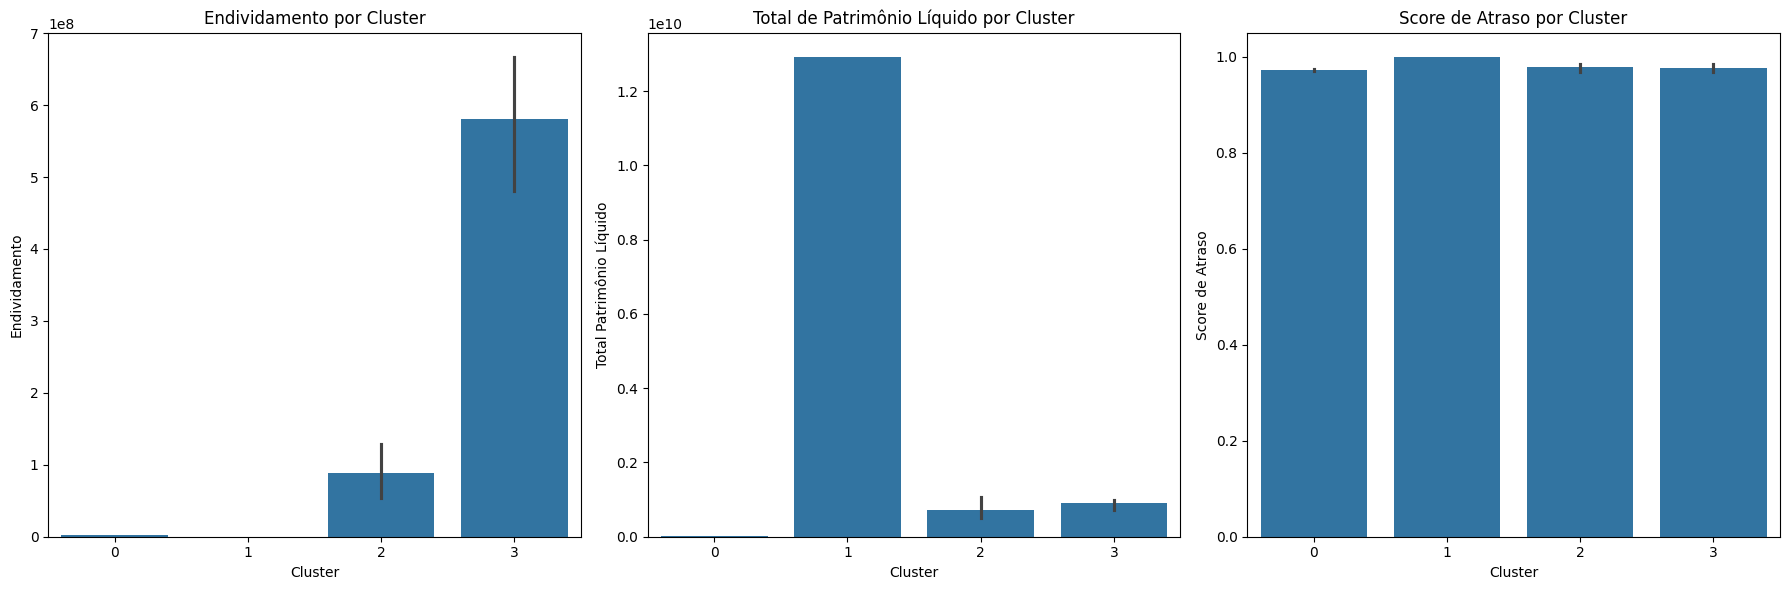

In [132]:


fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de barras para endividamento por cluster
sns.barplot(x='cluster', y='endividamento', data=solicitacoes_credito, ax=axs[0])
axs[0].set_title('Endividamento por Cluster')
axs[0].set_xlabel('Cluster')
axs[0].set_ylabel('Endividamento')

# Gráfico de barras para total de patrimônio líquido por cluster
sns.barplot(x='cluster', y='totalPatrimonioLiquido', data=solicitacoes_credito, ax=axs[1])
axs[1].set_title('Total de Patrimônio Líquido por Cluster')
axs[1].set_xlabel('Cluster')
axs[1].set_ylabel('Total Patrimônio Líquido')

# Gráfico de barras para score de atraso por cluster
sns.barplot(x='cluster', y='score_atraso', data=solicitacoes_credito, ax=axs[2])
axs[2].set_title('Score de Atraso por Cluster')
axs[2].set_xlabel('Cluster')
axs[2].set_ylabel('Score de Atraso')

plt.tight_layout()
plt.show()


In [133]:
# # Filtrar o DataFrame para incluir apenas as informações do cluster 0
# cluster_0 = solicitacoes_credito[solicitacoes_credito['cluster'] == 7]

# # Agrupar pelo campo 'cluster' e calcular a média de 'patrimonio' e 'endividamento'
# media_patrimonio_endividamento = cluster_0.groupby('cluster')[['totalPatrimonioLiquido', 'endividamento']].mean()

# # Definir a largura de cada barra
# largura_barra = 0.35
# clusters = media_patrimonio_endividamento.index

# # Criar subgráficos para patrimônio e endividamento lado a lado
# fig, ax = plt.subplots()

# # Barras para o patrimônio
# ax.bar(clusters - largura_barra/2, media_patrimonio_endividamento['totalPatrimonioLiquido'], width=largura_barra, label='Patrimonio Liquido', edgecolor="white", linewidth=0.7)

# # Barras para o endividamento
# ax.bar(clusters + largura_barra/2, media_patrimonio_endividamento['endividamento'], width=largura_barra, label='Endividamento', edgecolor="white", linewidth=0.7)


# # Configurações do gráfico
# ax.set_xlabel('Clusters')
# ax.set_ylabel('Valores Médios')

# ax.legend()

# # Exibir gráfico
# plt.show()

In [134]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Filtrar o DataFrame para incluir apenas as informações do cluster 0
# cluster_0 = solicitacoes_credito[solicitacoes_credito['cluster'] == 6]

# # Agrupar pelo campo 'cluster' e calcular a média de 'patrimonio', 'endividamento' e 'maiorAtraso'
# media_patrimonio_endividamento = cluster_0.groupby('cluster')[['totalPatrimonioLiquido', 'endividamento', 'maiorAtraso']].mean()

# # Definir a largura de cada barra
# largura_barra = 0.25
# clusters = np.arange(len(media_patrimonio_endividamento.index))  # Gera um array com os índices dos clusters

# # Criar subgráficos para patrimônio, endividamento e maior atraso lado a lado
# fig, ax = plt.subplots()

# # Barras para o patrimônio
# ax.bar(clusters - largura_barra, media_patrimonio_endividamento['totalPatrimonioLiquido'], width=largura_barra, label='Patrimônio Líquido', edgecolor="white", linewidth=0.7)

# # Barras para o endividamento
# ax.bar(clusters, media_patrimonio_endividamento['endividamento'], width=largura_barra, label='Endividamento', edgecolor="white", linewidth=0.7)

# # Barras para o maior atraso
# ax.bar(clusters + largura_barra, media_patrimonio_endividamento['maiorAtraso'], width=largura_barra, label='Maior Atraso', edgecolor="white", linewidth=0.7)

# # Configurações do gráfico
# ax.set_xlabel('Clusters')
# ax.set_ylabel('Valores Médios')
# ax.set_title('Comparação de Patrimônio, Endividamento e Maior Atraso por Cluster')
# ax.legend()

# # Exibir gráfico
# plt.show()


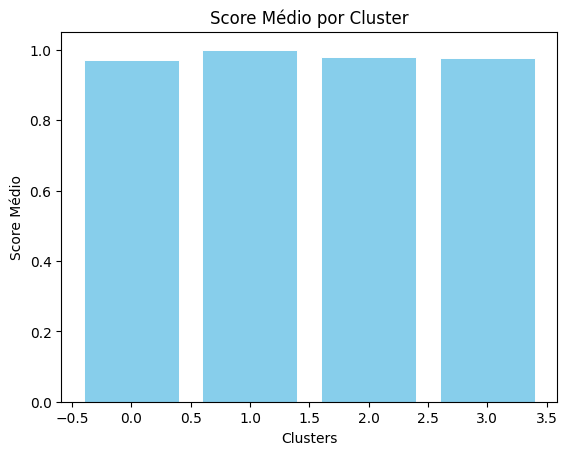

In [135]:
import matplotlib.pyplot as plt
import numpy as np

# Agrupar os dados pelo campo 'cluster' e calcular a média do 'score'
media_score = solicitacoes_credito.groupby('cluster')['score_atraso'].mean()

# Definir os clusters e o score médio
clusters = media_score.index
scores_medios = media_score.values

# Criar o gráfico de barras
fig, ax = plt.subplots()

# Barras representando o score médio de cada cluster
ax.bar(clusters, scores_medios, color='skyblue', edgecolor="white", linewidth=0.7)

# Configurações do gráfico
ax.set_xlabel('Clusters')
ax.set_ylabel('Score Médio')
ax.set_title('Score Médio por Cluster')

# Exibir o gráfico
plt.show()


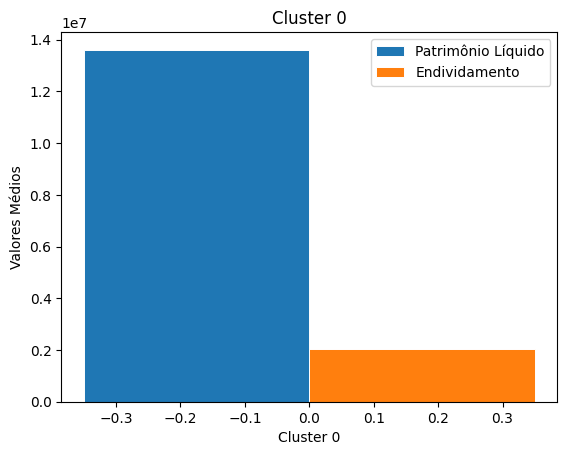

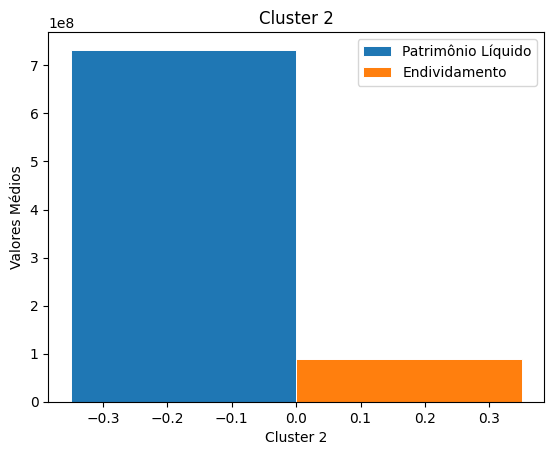

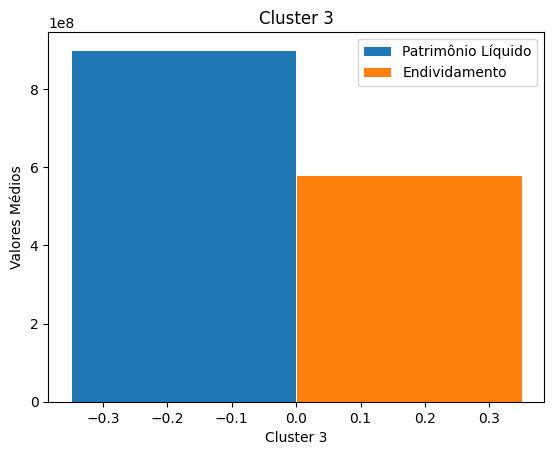

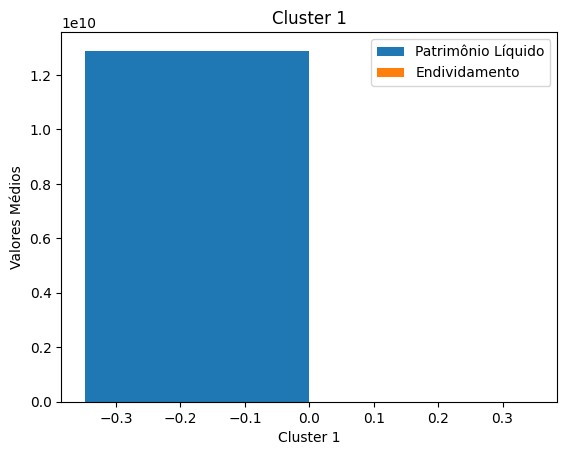

In [136]:
import matplotlib.pyplot as plt
import numpy as np

# Listar os clusters únicos presentes no DataFrame
clusters_unicos = solicitacoes_credito['cluster'].unique()

# Definir a largura de cada barra
largura_barra = 0.35

# Loop para gerar o gráfico de cada cluster
for cluster in clusters_unicos:
    # Filtrar o DataFrame para incluir apenas as informações do cluster atual
    cluster_data = solicitacoes_credito[solicitacoes_credito['cluster'] == cluster]
    
    # Agrupar pelo campo 'cluster' e calcular a média de 'patrimonio' e 'endividamento'
    media_patrimonio_endividamento = cluster_data.groupby('cluster')[['totalPatrimonioLiquido', 'endividamento']].mean()
    
    # Criar subgráficos para patrimônio e endividamento lado a lado
    fig, ax = plt.subplots()
    
    # Barras para o patrimônio
    ax.bar(np.arange(len(media_patrimonio_endividamento)) - largura_barra/2, 
           media_patrimonio_endividamento['totalPatrimonioLiquido'], 
           width=largura_barra, 
           label='Patrimônio Líquido', 
           edgecolor="white", 
           linewidth=0.7)
    
    # Barras para o endividamento
    ax.bar(np.arange(len(media_patrimonio_endividamento)) + largura_barra/2, 
           media_patrimonio_endividamento['endividamento'], 
           width=largura_barra, 
           label='Endividamento', 
           edgecolor="white", 
           linewidth=0.7)

    # Configurações do gráfico
    ax.set_xlabel('Cluster {}'.format(cluster))
    ax.set_ylabel('Valores Médios')
    ax.set_title(f'Cluster {cluster}')
    ax.legend()

    # Exibir o gráfico para cada cluster
    plt.show()
